In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Simple Harmonic Oscillator (Initial Value Problem)

The differential equation for SHO is given as: 
\begin{equation}
\ddot{x} = - \omega^{2} x
\end{equation}

The above can be written as 2 linear first order ODE as 
\begin{equation}
\dot{x} = v \& \dot{v} = - \omega^{2} x
\end{equation}

We need to study the time evolution of this SHO i.e., we integrate the equations of motion and find 'x' and see how the energy of the SHO evolves.

Analytically, we know that the total energy of the SHO is given as:
\begin{equation}
E = \frac{mv^{2}}{2} + \frac {m \omega^{2}x^{2}}{2}
\end{equation}

In [7]:
#Initial conditions and constants
x_ini = 1
v_ini = 0

omega = 1
dt = 0.1
nsteps = 1000
m = 1

In [8]:
#Euler method
def sho_euler(x_ini_val, v_ini_val, omega_val, dt_val, nsteps_val):
    x = []
    v = []
    t = []

    x.append(x_ini_val)
    v.append(v_ini_val)
    t.append(0)

    for i in range(nsteps_val - 1):
        x_new = x[i] + v[i] * dt_val
        v_new = v[i] - omega_val**2 * x[i] * dt_val
        t_new = t[i] + dt_val

        x.append(x_new)
        v.append(v_new)
        t.append(t_new)

    #print(f't:{t} | x:{x} | v:{v}')
    return pd.DataFrame({'Time': t, 'Position': x, 'Velocity': v})


In [ ]:
#Leapfrog method
def sho_leapfrog(x_ini_val, v_ini_val, omega_val, dt_val, nsteps_val):
    x = []
    v = []
    t = []

    x.append(x_ini_val)
    v_half = v_ini_val - 0.5 * omega_val**2 * x_ini_val * dt_val    #v_n+1/2
    v.append(v_half)
    t.append(0)

    for i in range(nsteps_val - 1):
        x_new = x[i] + v_half * dt_val
        v_new_half = v_half - omega_val**2 * x_new * dt_val
        t_new = t[i] + dt_val

        x.append(x_new)
        v.append(v_new_half + 0.5 * omega_val**2 * x_new * dt_val)  # Full step velocity
        t.append(t_new)

        v_half = v_new_half

    #print(f't:{t} | x:{x} | v:{v}')
    return pd.DataFrame({'Time': t, 'Position': x, 'Velocity': v})

In [13]:
def sho_energy(x_val, v_val, m_val, omega_val):
    E = 0.5 * m_val * v_val**2 + 0.5 * m_val * omega_val**2 * x_val**2
    return E

In [14]:
#Euler
df_e = sho_euler(x_ini, v_ini, omega, dt, nsteps)

# Leapfrog
df_l = sho_leapfrog(x_ini, v_ini, omega, dt, nsteps)


In [15]:
#Energy
E_e = sho_energy(df_e['Position'], df_e['Velocity'], m, omega)
E_l = sho_energy(df_l['Position'], df_l['Velocity'], m, omega)

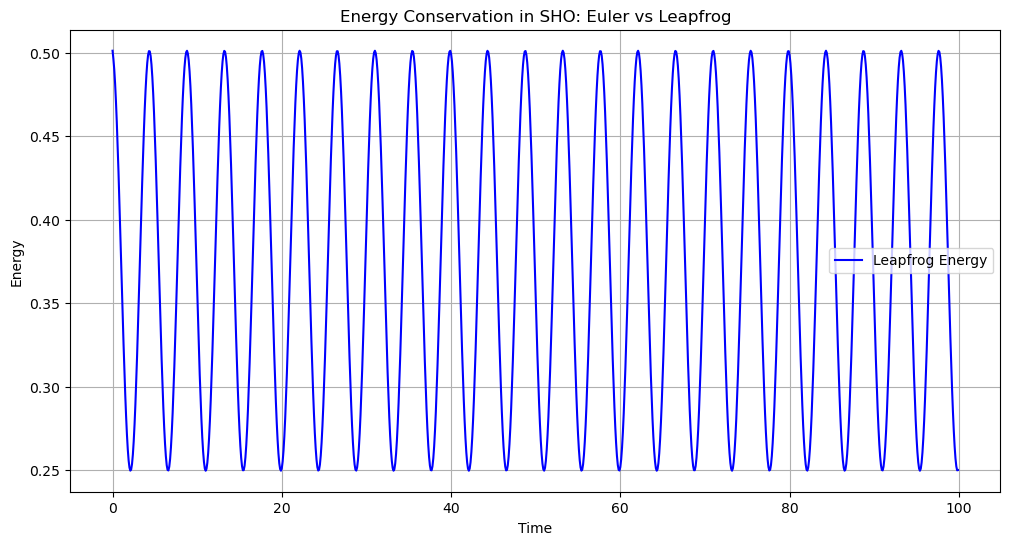

In [16]:
plt.figure(figsize=(12, 6))
#plt.plot(df_e['Time'], E_e, label='Euler Energy', color='red')
plt.plot(df_l['Time'], E_l, label='Leapfrog Energy', color='blue')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy Conservation in SHO: Euler vs Leapfrog')
plt.legend()
plt.grid()
plt.show()

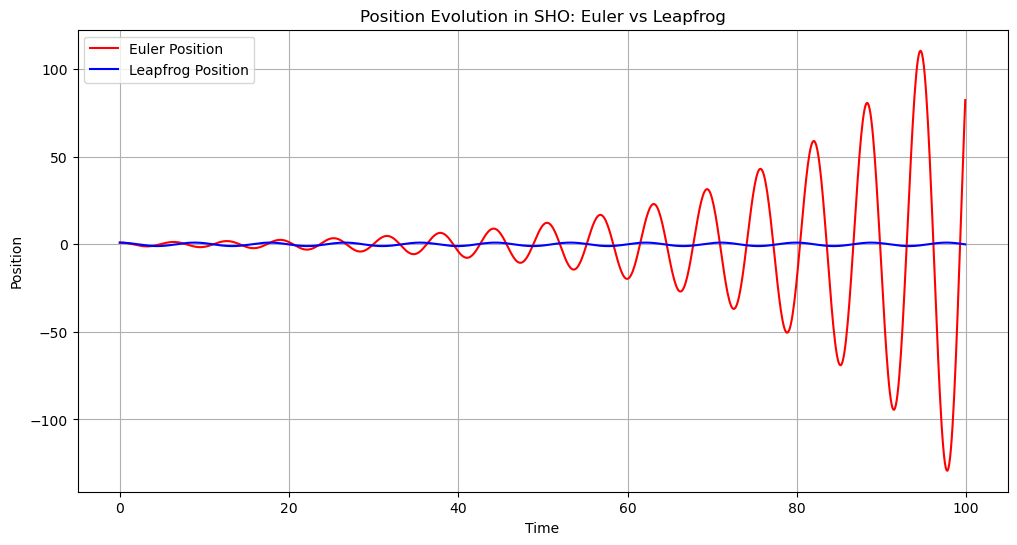

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df_e['Time'], df_e['Position'], label='Euler Position', color='red')
plt.plot(df_l['Time'], df_l['Position'], label='Leapfrog Position', color='blue')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Position Evolution in SHO: Euler vs Leapfrog')
plt.legend()
plt.grid()
plt.show()